In [84]:
'''
I've got this dataframe and tutorial by

https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

https://www.kaggle.com/code/dansbecker/basic-data-exploration/tutorial


'''

"\nI've got this dataframe and tutorial by\n\nhttps://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot\n\nhttps://www.kaggle.com/code/dansbecker/basic-data-exploration/tutorial\n\n\n"

In [140]:
import pandas as pd

# This library lets us work with desition trees
from sklearn.tree import DecisionTreeRegressor

# Metrics help us get our errors for accuracy
from sklearn.metrics import mean_absolute_error

#Train_test_split is fundamental to divide our data, test it and try our models
from sklearn.model_selection import train_test_split

# Imports Random Forests
from sklearn.ensemble import RandomForestRegressor


import matplotlib.pyplot as plt


from sklearn.tree import plot_tree


In [86]:
path = "data/housing_data.csv"

df = pd.read_csv(path)

# Let´s see whats inside

df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [87]:
df.head()

# A more general idea of the dataframe

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [88]:
df.columns

# Lets visualize our columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [89]:
# Calculate the number of missing values per column
missing_values = df.isnull().sum()
missing_values


Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [90]:
# Dropping all rows with any missing values to ensure the dataset is clean for modeling
df = df.dropna(axis=0)


In [91]:
# Lets define X and Y

# Separating the feature set (X) and the target variable 'Price' (Y)
X = df.drop(columns='Price', axis=1)  # Features (all columns except 'Price')
X = X.select_dtypes(exclude=['object'])

Y = df.Price  # Target variable (house prices)



Mean Absolute Error on training data: 432.45642349903164


## Basic Decision Tree Regressor


In [138]:
# Define model. Specify a number for random_state to ensure consistent results each run
model = DecisionTreeRegressor(random_state=1)

# Fit model
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred
mae_train = mean_absolute_error(Y, Y_pred)
print("Mean Absolute Error on training data:", mae_train)

# While this method is effective, using the entire dataset for training may lead to overfitting,
# making the model less accurate on unseen data. It is often better to split the data into training
# and testing sets to evaluate model performance more reliably.


Mean Absolute Error on training data: 432.45642349903164


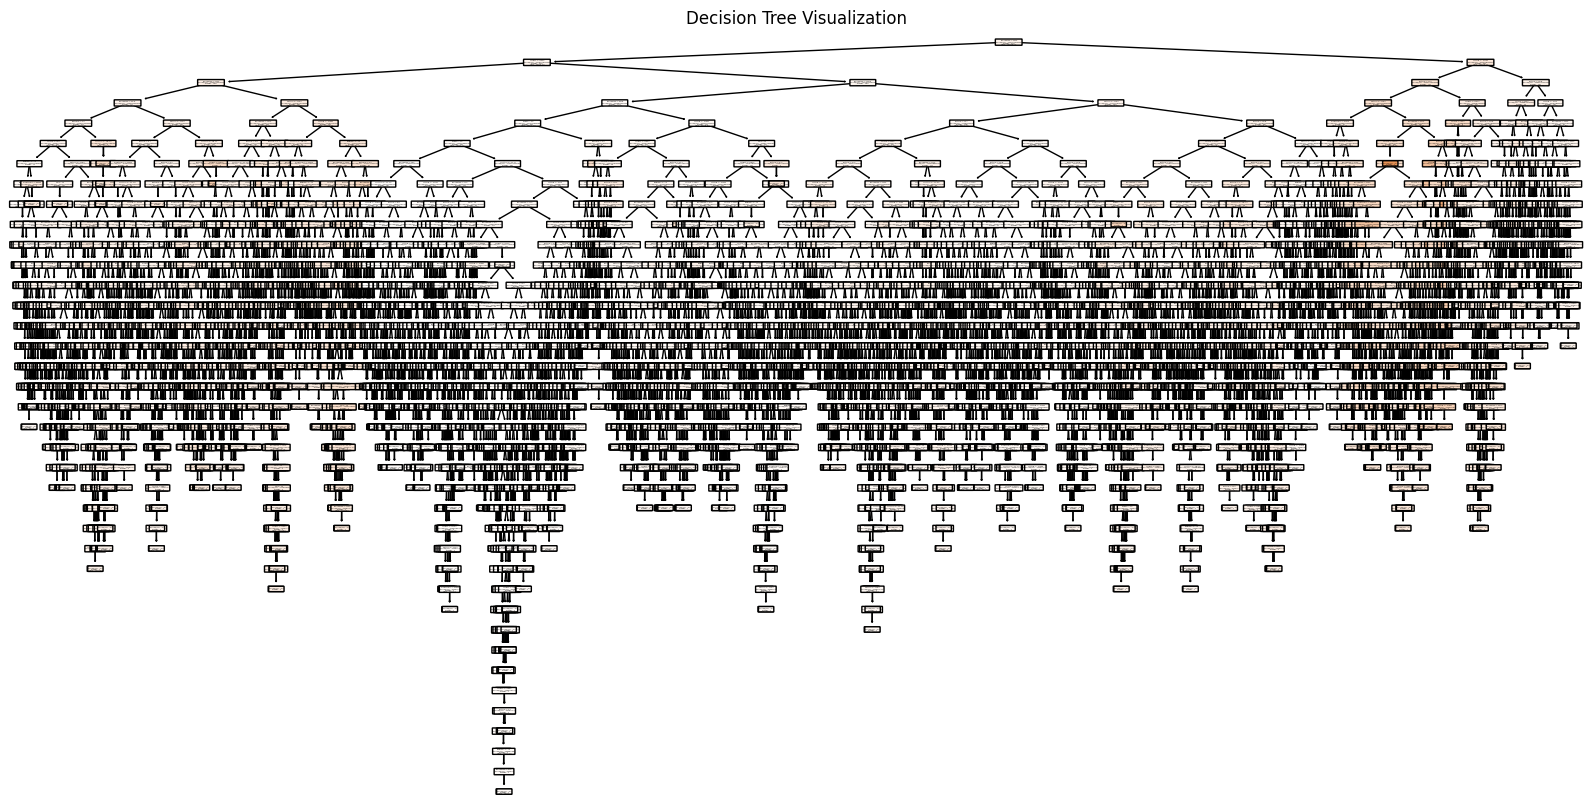

In [141]:
# Visualizing the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

## Predicting existing values to prove, our model it's good with already seen data

In [92]:
print("Making predictions for the following 5 houses:")
print("Actual Prices:")
print(Y.head())  # Actual target values (house prices)
print("The predictions are:")
print(model.predict(X.head()))  # Predictions using the numeric features


Making predictions for the following 5 houses:
Actual Prices:
1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64
The predictions are:
[1035000. 1465000. 1600000. 1876000. 1636000.]


## Let's validate our model by splitting data, to see it's performance with unseen data

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# Define the model
new_model = DecisionTreeRegressor()

# Fit the model using the training data
new_model.fit(X_train, Y_train)

# Get predicted prices on the testing data
new_Y_pred = new_model.predict(X_test)

# Calculate and print the mean absolute error for the testing data
mae_test = mean_absolute_error(Y_test, new_Y_pred)
print("Mean Absolute Error on test data:", mae_test)


Mean Absolute Error on test data: 246100.8934796643


## Underfitting

**Definition**: Occurs when a model is too simple to capture data patterns, leading to insufficient learning.

**Causes**:
- Basic model (e.g., straight line for a curve).
- Insufficient training time.
- Missing relevant features.

**Signs**:
- Poor performance on training and test data.
- High error rates.

**Example**: A straight line fails to capture a curve’s shape, leading to inaccurate predictions.

---

## Overfitting

**Definition**: Happens when a model learns too much from training data, including noise, making it overly complex.

**Causes**:
- Complex model (e.g., deep decision tree).
- Excessive training.
- Too many features, including irrelevant ones.

**Signs**:
- Great performance on training data but poor on test data.
- Low training error with high testing error.

**Example**: A complex curve fits training data perfectly but fails on new data.


In [96]:
print(f'''
      - Training MAE: {mae_train} (small number)
      - Testing MAE: {mae_test} (large number)

      This significant difference suggests that the model may be overfitting.
      ''')



      - Training MAE: 432.45642349903164 (small number)
      - Testing MAE: 246100.8934796643 (large number)

      This significant difference suggests that the model may be overfitting.
      


## Node Testing

In [101]:
# I'm going to create a function that tests different max nodes
# to see which number of nodes is best

def get_mae(max_leaf_nodes, X_train, X_test, Y_train, Y_test):
    # Define and fit the model with specified max_leaf_nodes
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, Y_train)

    # Make predictions on the validation set
    preds_val = model.predict(X_test)

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(Y_test, preds_val)
    
    return mae


In [114]:
Mae_compare=[5, 50, 500, 5000,50000,500000]
lowest_mae = float('inf')  # Initialize to a high value
lowest_node = None  # Initialize lowest_node
i = 0
# We are going to work with a mini controlled forest
# where we can compare different MAEs manually

# Compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in Mae_compare:
    # Get the Mean Absolute Error for the current max_leaf_nodes value
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, Y_train, Y_test)
    

    # Print the results in a formatted string
    print(f"Max leaf nodes: {max_leaf_nodes} \t Mean Absolute Error: {my_mae:.2f}")
    if my_mae < lowest_mae or max_leaf_nodes == Mae_compare[0]:
        lowest_mae = my_mae
        lowest_node = Mae_compare[i]
    i+=1       
    
print(f"Therefore the best node is {lowest_node} with {lowest_mae:.2f}")

Max leaf nodes: 5 	 Mean Absolute Error: 347380.34
Max leaf nodes: 50 	 Mean Absolute Error: 256663.22
Max leaf nodes: 500 	 Mean Absolute Error: 240264.41
Max leaf nodes: 5000 	 Mean Absolute Error: 248097.95
Max leaf nodes: 50000 	 Mean Absolute Error: 248097.95
Max leaf nodes: 500000 	 Mean Absolute Error: 248097.95
Therefore the best node is 500 with 240264.41


## Random Forest Regression

In [130]:
# To work with random forest, first we call the object we are gonna work on
# This is alike the code above, tho its a more powerfull tool

forest_model = RandomForestRegressor(random_state=1)

# Then train it with our variables
forest_model.fit(X_train, Y_train)

# calculate its predictions
forest_preds = forest_model.predict(X_test)

# and compare how good was our model against unseen data

forest_mae=mean_absolute_error(Y_test, forest_preds)



The most accurate MAE, we can get is 181631.34 seems good to me


In [133]:
# Calculate the mean of Y (target variable)
mean_y = Y_test.mean()

# Calculate the percentage of MAE relative to the mean of Y
mae_percentage = (forest_mae / mean_y) * 100

print(f"The Mean Absolute Error is {forest_mae:.2f}, which is {mae_percentage:.2f}% of the mean of Y.")
print(f"This means if our model makes a prediction it'll be +-{mae_percentage:.2f}% trustworthy")


The Mean Absolute Error is 181631.34, which is 16.64% of the mean of Y.
This means if our model makes a prediction it'll be +-16.64% trustworthy
